<a href="https://colab.research.google.com/github/sagarbhadra7/Python-Programs/blob/master/timeforcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from fbprophet import Prophet
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [0]:
test_path='/content/test_pavJagI.csv'
train_path='/content/train_6BJx641.csv'

In [0]:
test_data=pd.read_csv(test_path,parse_dates=['datetime'])
train_data=pd.read_csv(train_path,parse_dates=['datetime'])
#test_data.drop(columns=['ID'],inplace=True)
#train_data.drop(columns=['ID'],inplace=True)

In [90]:
test_data.head()

,ID,datetime,temperature,var1,pressure,windspeed,var2
0,552,2013-07-24 00:00:00,-10.0,-16.4,1011.0,263.280,A
1,553,2013-07-24 01:00:00,-10.0,-20.7,1011.0,267.175,A
2,554,2013-07-24 02:00:00,-10.7,-17.1,1003.0,269.555,A
3,555,2013-07-24 03:00:00,-13.6,-20.7,1008.0,273.060,A
4,556,2013-07-24 04:00:00,-10.7,-17.1,1006.0,1.765,A


In [91]:
train_data.head()

,ID,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption
0,0,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,A,216.0
1,1,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,A,210.0
2,2,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,A,225.0
3,3,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,A,216.0
4,4,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,A,222.0


In [92]:
test_data.dtypes

ID                      int64
datetime       datetime64[ns]
temperature           float64
var1                  float64
pressure              float64
windspeed             float64
var2                   object
dtype: object

In [93]:
train_data.dtypes

ID                                  int64
datetime                   datetime64[ns]
temperature                       float64
var1                              float64
pressure                          float64
windspeed                         float64
var2                               object
electricity_consumption           float64
dtype: object

In [94]:
train_data.isnull().sum()

ID                         0
datetime                   0
temperature                0
var1                       0
pressure                   0
windspeed                  0
var2                       0
electricity_consumption    0
dtype: int64

In [95]:
test_data.isnull().sum()

ID             0
datetime       0
temperature    0
var1           0
pressure       0
windspeed      0
var2           0
dtype: int64

In [96]:
train_data.isna().sum()

ID                         0
datetime                   0
temperature                0
var1                       0
pressure                   0
windspeed                  0
var2                       0
electricity_consumption    0
dtype: int64

In [0]:
le=LabelEncoder()
train_data['var2']=le.fit_transform(train_data['var2'])

In [0]:
X=train_data.iloc[:,:-1]
y=train_data['electricity_consumption']

In [99]:
X.head()

,ID,datetime,temperature,var1,pressure,windspeed,var2
0,0,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,0
1,1,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,0
2,2,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,0
3,3,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,0
4,4,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,0


In [100]:
type(y)

pandas.core.series.Series

In [101]:
train_data.shape

(26496, 8)

In [102]:
test_data.shape

(8568, 7)

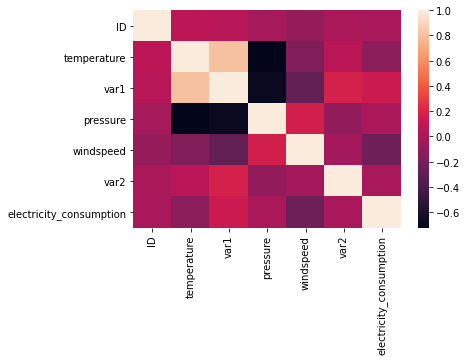

In [103]:
sns.heatmap(train_data.corr())
plt.show()

In [104]:
train_data.describe()

,ID,temperature,var1,pressure,windspeed,var2,electricity_consumption
count,26496.000000,26496.000000,26496.000000,26496.000000,26496.000000,26496.000000,26496.000000
mean,17455.500000,5.098989,-1.916233,986.450615,23.959956,0.086692,298.359601
std,10122.873673,8.682860,10.424860,12.002647,48.280321,0.397096,108.020555
min,0.000000,-17.100000,-32.900000,953.000000,1.075000,0.000000,174.000000
25%,8717.750000,-2.900000,-10.700000,978.000000,3.155000,0.000000,219.000000
50%,17435.500000,6.400000,-1.400000,986.000000,6.545000,0.000000,267.000000
75%,26177.250000,12.100000,7.900000,995.000000,22.260000,0.000000,342.000000
max,34895.000000,23.600000,18.600000,1024.000000,586.600000,2.000000,1386.000000


In [0]:
model= Prophet()

In [106]:
model.fit(X,y)

TypeError: ignored